## Notebook to illustrate the application of the probablistic jerk finder to multiple jerks.

#### Here is an assumed underlying piecewise linear time dependence with a change in slope at t=25, t=40 and t=60:

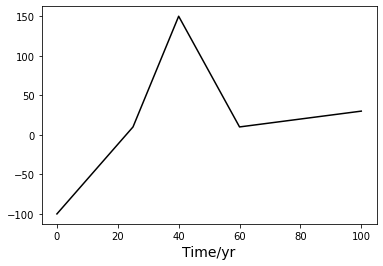

In [2]:
import matplotlib.pyplot as plt
import numpy as np
time_for_plotting = np.linspace(0,100,100,endpoint=True)
plt.figure()
plt.plot([0,25,40,60,100],[-100,10,150,10,30],'k');
plt.xlabel('Time/yr',fontsize=14)
plt.savefig('example2_raw_signal.pdf',bbox_inches='tight')

#### Now we sample the timeseries at NUM_DATA points (here, assumed equally spaced) and add noise (assumed normally distributed with known standard deviation)

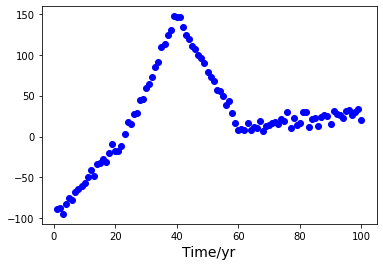

In [3]:
plt.figure()
np.random.seed(seed = 10)
NUM_DATA = 100
TIMES = np.linspace(1,100,NUM_DATA,dtype=float)
delta_Y = 5 * np.ones(NUM_DATA)
Y = np.interp(TIMES,[0,25,40,60,100],[-100,10,150,10,30]) + np.random.normal(loc=0,scale=delta_Y)
plt.plot(TIMES, Y,'ob');
plt.xlabel('Time/yr',fontsize=14)
plt.savefig('example2_noised_signal.pdf',bbox_inches='tight')

In [5]:
import os
import sys
sys.path.append( os.path.abspath('..') )
from jerks import jerks
import numpy as np

# Define parameters for method:

Y_MIN = -200
Y_MAX = 200
discretise_size = 100

TIMES_MIN = 0.0
TIMES_MAX = 100.0
K_MIN = 0
K_MAX = 100
sigmas = np.array([10,5,10],dtype = float)

# sigma_change_value = sigmas(1)
# sigma_move = sigmas(2)
# sigma_birth = sigmas(3)

THIN = 100
NBINS = 100
credible = 95
RUNNING_MODE = 1
burn_in = 10000
NSAMPLE = 2000000+burn_in
CP_NBINS = 101  #collect change point histogram over 101 bins for the 100 time units
CP_EDGES = np.linspace(TIMES_MIN-0.5, TIMES_MAX+0.5, CP_NBINS+1, endpoint = True)

# define spaces for outputs
Acceptance_rates=np.zeros(4)
AV = np.zeros(discretise_size,dtype=float)
SUP = np.zeros(discretise_size,dtype=float)
INF = np.zeros(discretise_size,dtype=float)
MEDIAN = np.zeros(discretise_size,dtype=float)
MODE = np.zeros(discretise_size,dtype=float)
CP_hist = np.zeros( CP_NBINS,dtype=int )
MARGINAL_DENSITY = np.zeros( (discretise_size,NBINS),dtype=float )
N_CP_hist = np.zeros( K_MAX-K_MIN+1, dtype=int)

(Acceptance_rates, SUP, INF,AV, MEDIAN, MODE, CP_hist, MARGINAL_DENSITY, N_CP_hist) = jerks.rjmcmc(
 sigmas=sigmas, burn_in=burn_in, 
 nsample=NSAMPLE, num_data=NUM_DATA, times=TIMES, y=Y, delta_y=delta_Y, 
 y_min=Y_MIN, y_max=Y_MAX, times_min=TIMES_MIN, times_max=TIMES_MAX, k_min=K_MIN, 
 k_max=K_MAX, discretise_size=discretise_size, cp_nbins = CP_NBINS, cp_edges = CP_EDGES,
 thin=THIN, nbins=NBINS, credible=credible, running_mode=RUNNING_MODE)


print('Acceptance rates should ideally be 10-40%')
print(Acceptance_rates)

Acceptance rates should ideally be 10-40%
[18.73859978  6.36901999  2.55253124  2.5559597 ]


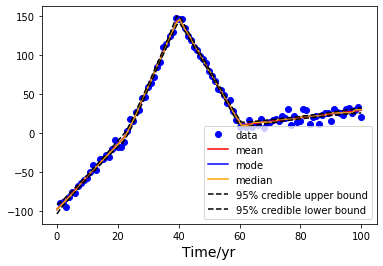

In [6]:
plt.figure()
plt.plot(TIMES,Y,'bo', label='data')
plt.plot(time_for_plotting,AV,'r', label='mean')
plt.plot(time_for_plotting,MODE, 'b',  label='mode')
plt.plot(time_for_plotting,MEDIAN, 'orange',  label='median')
plt.plot(time_for_plotting, SUP,'k--',  label='95% credible upper bound')
plt.plot(time_for_plotting,INF, 'k--',  label='95% credible lower bound')
plt.legend(loc='lower right')
plt.xlabel('Time/yr',fontsize=14)
plt.savefig('example2_posterior.pdf',bbox_inches='tight')

#### Histogram of vertex probability with original time series. The vertical scale indicates the probability that an internal vertex is in each (1 time unit) bin:

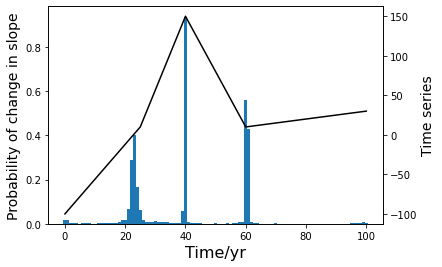

In [7]:
# Binning in code:
# bins are [-0.5,0.5] [0.5,1.5] ....
# 
plt.figure()
fac = (NSAMPLE-burn_in)/THIN
left_edges = CP_EDGES[:CP_NBINS] # use the left edgesax = plt.gca()
plt.bar(left_edges, CP_hist/fac, align='edge', 
        width = CP_EDGES[1:] - CP_EDGES[0:CP_NBINS])
ax2 = ax.twinx()
plt.plot([0,25,40,60,100],[-100,10,150,10,30],'k');
ax.set_xlabel('Time/yr',fontsize=16)
ax.set_ylabel('Probability of change in slope',fontsize=14)
ax2.set_ylabel('Time series',fontsize=14)
plt.savefig('example2_jerk_timing.pdf',bbox_inches='tight')

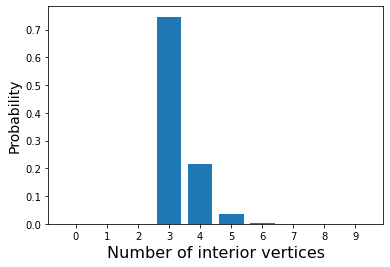

In [13]:
plt.figure()
left_edges_N_CP =  np.arange(K_MIN, K_MAX+1)
plt.bar( np.arange(0, 10),N_CP_hist[0:10]/np.sum(N_CP_hist),align='center',tick_label=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Number of interior vertices',fontsize=16)
plt.ylabel('Probability',fontsize=14)
plt.savefig('example2_number_vertices.pdf',bbox_inches='tight')

In [17]:
from scipy.signal import find_peaks
peaks,_ = find_peaks(CP_hist/fac, height=0.1)
for i in peaks:
    print('Most probable change in slope is between {0:f} and {1:f}'.
      format(left_edges[i], left_edges[i+1]))

Most probable change in slope is between 22.500000 and 23.500000
Most probable change in slope is between 39.500000 and 40.500000
Most probable change in slope is between 59.500000 and 60.500000


#### Larger bin sizes:

In [18]:
import os
import sys
sys.path.append( os.path.abspath('..') )
from jerks import jerks
import numpy as np

# Define parameters for method:

Y_MIN = -200
Y_MAX = 200
discretise_size = 100

TIMES_MIN = 0.0
TIMES_MAX = 100.0
K_MIN = 0
K_MAX = 100
sigmas = np.array([10,5,10],dtype = float)

# sigma_change_value = sigmas(1)
# sigma_move = sigmas(2)
# sigma_birth = sigmas(3)

THIN = 100
NBINS = 100
credible = 95
RUNNING_MODE = 1
burn_in = 10000
NSAMPLE = 2000000+burn_in
CP_NBINS = 11  #collect change point histogram over 11 bins for the 100 time units
CP_EDGES = np.linspace(TIMES_MIN-0.5, TIMES_MAX+0.5, CP_NBINS+1, endpoint = True)

# define spaces for outputs
Acceptance_rates=np.zeros(4)
AV = np.zeros(discretise_size,dtype=float)
SUP = np.zeros(discretise_size,dtype=float)
INF = np.zeros(discretise_size,dtype=float)
MEDIAN = np.zeros(discretise_size,dtype=float)
MODE = np.zeros(discretise_size,dtype=float)
CP_hist = np.zeros( CP_NBINS,dtype=int )
MARGINAL_DENSITY = np.zeros( (discretise_size,NBINS),dtype=float )
N_CP_hist = np.zeros( K_MAX-K_MIN+1, dtype=int)

(Acceptance_rates, SUP, INF,AV, MEDIAN, MODE, CP_hist, MARGINAL_DENSITY, N_CP_hist) = jerks.rjmcmc(
 sigmas=sigmas, burn_in=burn_in, 
 nsample=NSAMPLE, num_data=NUM_DATA, times=TIMES, y=Y, delta_y=delta_Y, 
 y_min=Y_MIN, y_max=Y_MAX, times_min=TIMES_MIN, times_max=TIMES_MAX, k_min=K_MIN, 
 k_max=K_MAX, discretise_size=discretise_size, cp_nbins = CP_NBINS, cp_edges = CP_EDGES,
 thin=THIN, nbins=NBINS, credible=credible, running_mode=RUNNING_MODE)


print('Acceptance rates should ideally be 10-40%')
print(Acceptance_rates)

Acceptance rates should ideally be 10-40%
[18.73859978  6.36901999  2.55253124  2.5559597 ]


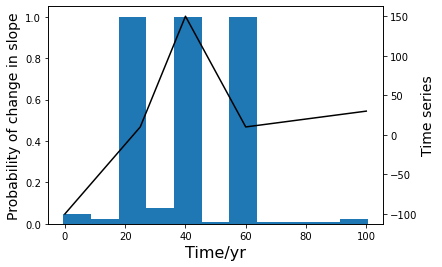

In [24]:
# Binning in code:
# 
fig,ax = plt.subplots(1)
fac = (NSAMPLE-burn_in)/THIN
left_edges = CP_EDGES[:CP_NBINS] # use the left edgesax = plt.gca()
plt.bar(left_edges, CP_hist/fac, align='edge', 
        width = CP_EDGES[1:] - CP_EDGES[0:CP_NBINS])
ax2 = ax.twinx()
plt.plot([0,25,40,60,100],[-100,10,150,10,30],'k');
ax.set_xlabel('Time/yr',fontsize=16)
ax.set_ylabel('Probability of change in slope',fontsize=14)
ax2.set_ylabel('Time series',fontsize=14)
plt.savefig('example2_jerk_timing.pdf',bbox_inches='tight')

In [20]:
CP_EDGES

array([ -0.5       ,   8.68181818,  17.86363636,  27.04545455,
        36.22727273,  45.40909091,  54.59090909,  63.77272727,
        72.95454545,  82.13636364,  91.31818182, 100.5       ])

In [21]:
CP_hist


array([  993,   474, 19985,  1483, 20000,   209, 20000,   216,   172,
         166,   416], dtype=int32)

In [22]:
fac

20000.0